# Analysis of NMF bicv for enterosignature rank choice

In [2]:
from statistics import median, mean
import json
import matplotlib.pylab as plt
import numpy as np


In [13]:
inpdir = f"."

In [14]:
# if True, outputs will be written

WRITE_OUTPUT = True

output = inpdir #"bicv_rank_analysis/"

## Explained variance

In [16]:
raw_file = inpdir + "/biCV_evar.json"

In [17]:
with open(raw_file, "r") as f:
    raw = json.load(f)

In [18]:
# Determine the ranks used
ranks = sorted(int(x) for x in raw[0]['0'].keys())
resdic = {k: {"A": [], "B": [], "C": [], "D": []} for k in ranks}
resA = {k: [] for k in ranks}

#raw is a list of dicts
for d in raw: #run'th element of the list
    # d is a dict of dicts. Its keys are the matrices, subkeys are ranks. subsubkeys are A, B, C, D submatrices
    for mx in d:
        for rank in d[mx]:
            resA[int(rank)].extend(d[mx][rank]["A"])
            for letter in d[mx][rank]:
                # we have a list of values depending on the number of repetitions
                resdic[int(rank)][letter].extend(d[mx][rank][letter])

In [ ]:
#print([len(resdic[rank][letter]) for letter in "ABCD" for rank in resdic])

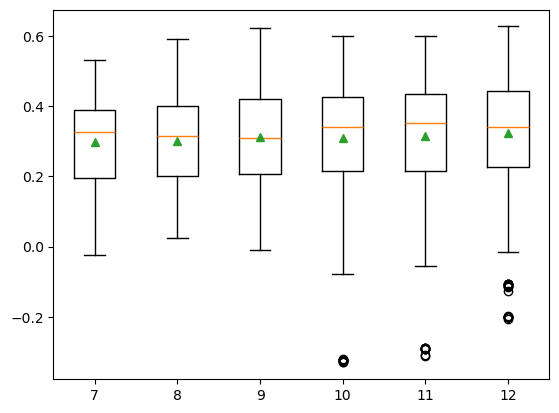

In [19]:
labels, data = [*zip(*resA.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
#labels, data = dict1.keys(), dict1.values()

plt.boxplot(data, showmeans=True)
plt.xticks(range(1, len(labels) + 1), labels)
#plt.ylim(bottom=-1, top = 1.1)
plt.show()

if WRITE_OUTPUT:
    with open(f"{output}/bicv_evar.tsv", "w") as f:
        for i in range(0, len(labels)):
            for j in data[i]:
                f.write(str(labels[i]) + "\t" + str(j) + "\n")

In [20]:
meansA = {k: mean(resA[k]) for k in resA}
mediansA = {k: median(resA[k]) for k in resA}

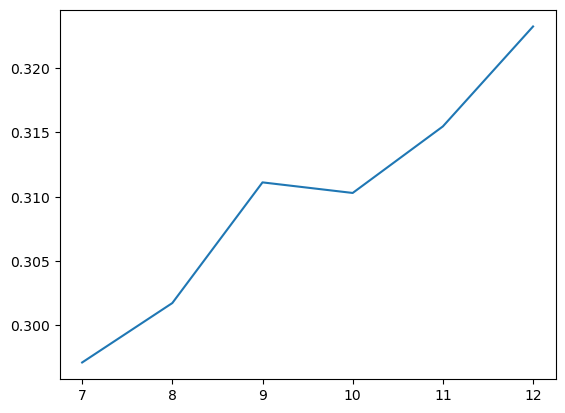

In [21]:
lists = sorted(meansA.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

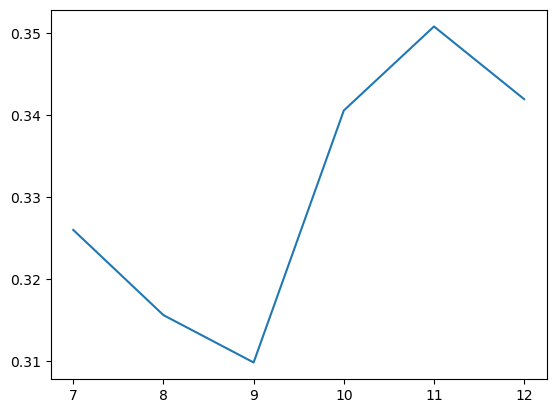

In [22]:
lists = sorted(mediansA.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

## Reconstruction error

In [25]:
raw_re_file = inpdir + "/biCV_reco_error.json"

In [26]:
with open(raw_re_file, "r") as f:
    raw_re = json.load(f)

In [27]:
resdic_re = {k: {"A": [], "B": [], "C": [], "D": []} for k in ranks}
resA_re = {k: [] for k in ranks}

#raw is a list of dicts
for d in raw_re: #run'th element of the list
    # d is a dict of dicts. Its keys are the matrices, subkeys are ranks. subsubkeys are A, B, C, D submatrices
    for mx in d:
        for rank in d[mx]:
            resA_re[int(rank)].extend(d[mx][rank]["A"])
            for letter in d[mx][rank]:
                # we have a list of values depending on the number of repetitions
                resdic_re[int(rank)][letter].extend(d[mx][rank][letter])

In [28]:
#print([len(resdic_re[rank][letter]) for letter in "ABCD" for rank in resdic_re])

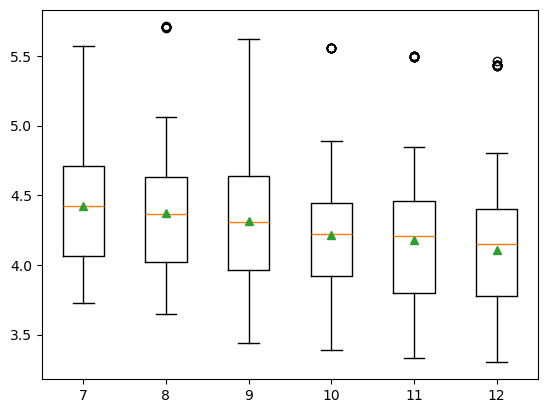

In [29]:
labels_re, data_re = [*zip(*resA_re.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
#labels, data = dict1.keys(), dict1.values()

plt.boxplot(data_re, showmeans=True)
plt.xticks(range(1, len(labels_re) + 1), labels_re)
#plt.ylim(bottom=-1, top = 1.1)
plt.show()

if WRITE_OUTPUT:
    with open(f"{output}/bicv_recerror.tsv", "w") as f:
        for i in range(0, len(labels_re)):
            for j in data_re[i]:
                f.write(str(labels_re[i]) + "\t" + str(j) + "\n")

In [30]:
meansA_re = {k: mean(resA_re[k]) for k in resA_re}
mediansA_re = {k: median(resA_re[k]) for k in resA_re}

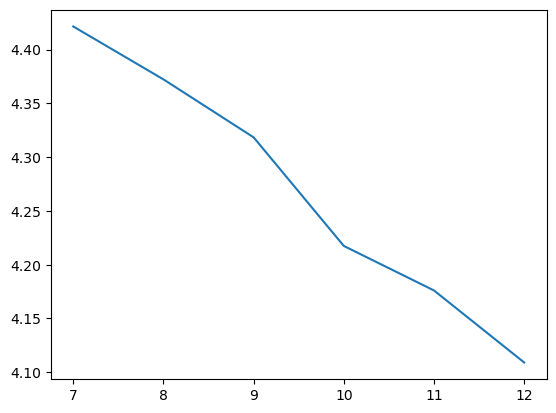

In [31]:
lists_re = sorted(meansA_re.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_re) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

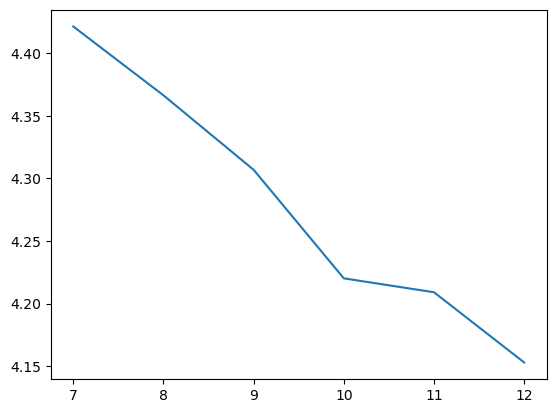

In [32]:
lists_re = sorted(mediansA_re.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_re) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

## RSS

In [36]:
raw_rss_file = inpdir + "/biCV_rss.json"

In [37]:
with open(raw_rss_file, "r") as f:
    raw_rss = json.load(f)

In [39]:
resdic_rss = {k: {"A": [], "B": [], "C": [], "D": []} for k in ranks}
resA_rss = {k: [] for k in ranks}

#raw is a list of dicts
for d in raw_rss: #run'th element of the list
    # d is a dict of dicts. Its keys are the matrices, subkeys are ranks. subsubkeys are A, B, C, D submatrices
    for mx in d:
        for rank in d[mx]:
            resA_rss[int(rank)].extend(d[mx][rank]["A"])
            for letter in d[mx][rank]:
                # we have a list of values depending on the number of repetitions
                resdic_rss[int(rank)][letter].extend(d[mx][rank][letter])

In [ ]:
#print([len(resdic_rss[rank][letter]) for letter in "ABCD" for rank in resdic_rss])

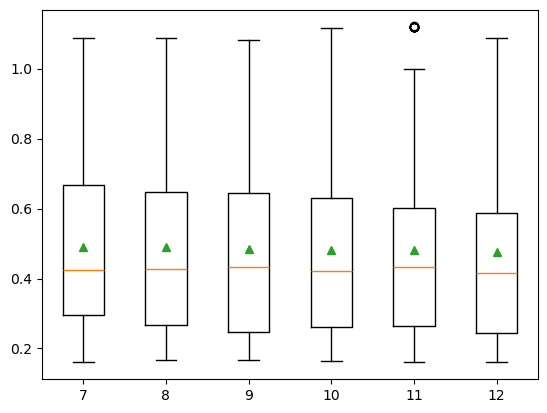

In [40]:
labels_rss, data_rss = [*zip(*resA_rss.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
#labels, data = dict1.keys(), dict1.values()

plt.boxplot(data_rss, showmeans=True)
plt.xticks(range(1, len(labels_rss) + 1), labels_rss)
#plt.ylim(bottom=-1, top = 1.1)
plt.show()

if WRITE_OUTPUT:
    with open(f"{output}/bicv_rss.tsv", "w") as f:
        for i in range(0, len(labels_rss)):
            for j in data_rss[i]:
                f.write(str(labels_rss[i]) + "\t" + str(j) + "\n")

In [41]:
meansA_rss = {k: mean(resA_rss[k]) for k in resA_rss}
mediansA_rss = {k: median(resA_rss[k]) for k in resA_rss}

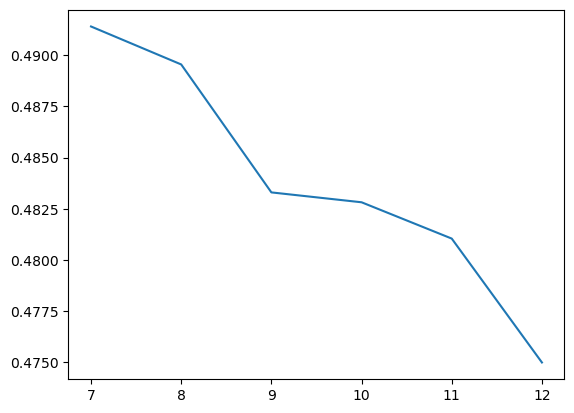

In [42]:
lists_rss = sorted(meansA_rss.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_rss) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

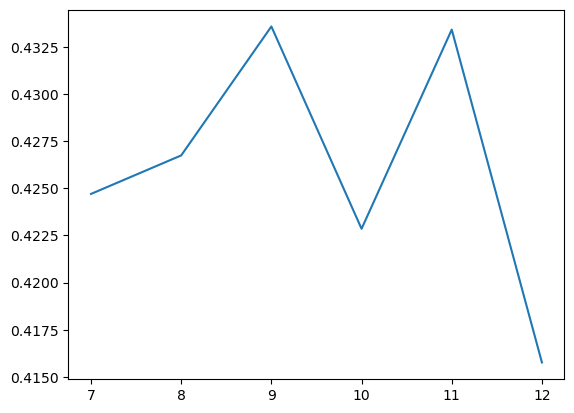

In [43]:
lists_rss = sorted(mediansA_rss.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_rss) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

## Cosine similarity

In [44]:
raw_cosine_file = inpdir + "/biCV_cosine.json"

In [45]:
with open(raw_cosine_file, "r") as f:
    raw_cosine = json.load(f)

In [47]:
resdic_cosine = {k: {"A": [], "B": [], "C": [], "D": []} for k in ranks}
resA_cosine = {k: [] for k in ranks}

#raw is a list of dicts
for d in raw_cosine: #run'th element of the list
    # d is a dict of dicts. Its keys are the matrices, subkeys are ranks. subsubkeys are A, B, C, D submatrices
    for mx in d:
        for rank in d[mx]:
            resA_cosine[int(rank)].extend(d[mx][rank]["A"])
            for letter in d[mx][rank]:
                # we have a list of values depending on the number of repetitions
                resdic_cosine[int(rank)][letter].extend(d[mx][rank][letter])

In [48]:
#print([len(resdic_cosine[rank][letter]) for letter in "ABCD" for rank in resdic_cosine])

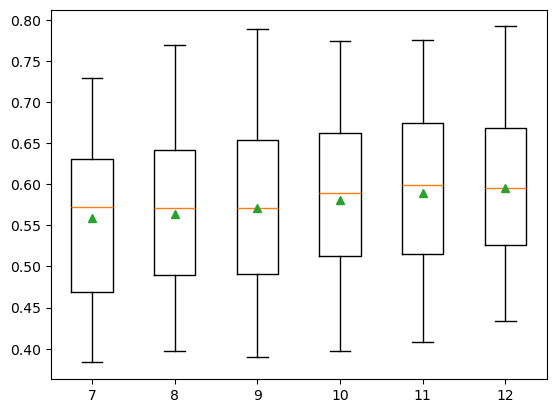

In [49]:
labels_cosine, data_cosine = [*zip(*resA_cosine.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
#labels, data = dict1.keys(), dict1.values()

plt.boxplot(data_cosine, showmeans=True)
plt.xticks(range(1, len(labels_cosine) + 1), labels_cosine)
#plt.ylim(bottom=-1, top = 1.1)
plt.show()

if WRITE_OUTPUT:
    with open(f"{output}/bicv_cosine.tsv", "w") as f:
        for i in range(0, len(labels_cosine)):
            for j in data_cosine[i]:
                f.write(str(labels_cosine[i]) + "\t" + str(j) + "\n")

In [50]:
meansA_cosine = {k: mean(resA_cosine[k]) for k in resA_cosine}
mediansA_cosine = {k: median(resA_cosine[k]) for k in resA_cosine}

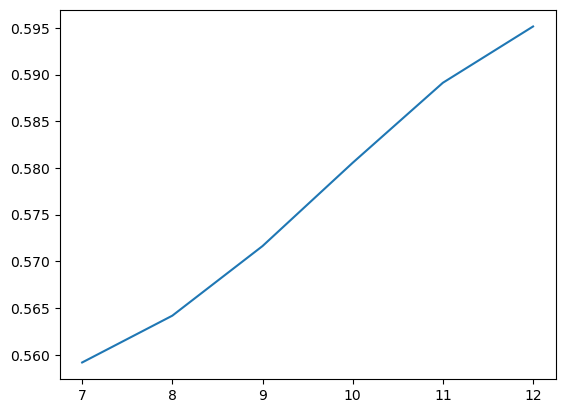

In [51]:
lists_cosine = sorted(meansA_cosine.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_cosine) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

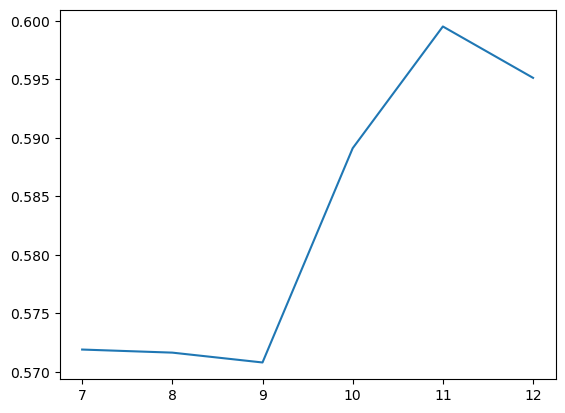

In [52]:
lists_cosine = sorted(mediansA_cosine.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_cosine) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

## L2 norm distance

In [53]:
raw_l2_file = inpdir + "/biCV_l2norm.json"

In [54]:
with open(raw_l2_file, "r") as f:
    raw_l2 = json.load(f)

In [56]:
resdic_l2 = {k: {"A": [], "B": [], "C": [], "D": []} for k in ranks}
resA_l2 = {k: [] for k in ranks}

#raw is a list of dicts
for d in raw_l2: #run'th element of the list
    # d is a dict of dicts. Its keys are the matrices, subkeys are ranks. subsubkeys are A, B, C, D submatrices
    for mx in d:
        for rank in d[mx]:
            resA_l2[int(rank)].extend(d[mx][rank]["A"])
            for letter in d[mx][rank]:
                # we have a list of values depending on the number of repetitions
                resdic_l2[int(rank)][letter].extend(d[mx][rank][letter])

In [ ]:
#print([len(resdic_l2[rank][letter]) for letter in "ABCD" for rank in resdic_l2])

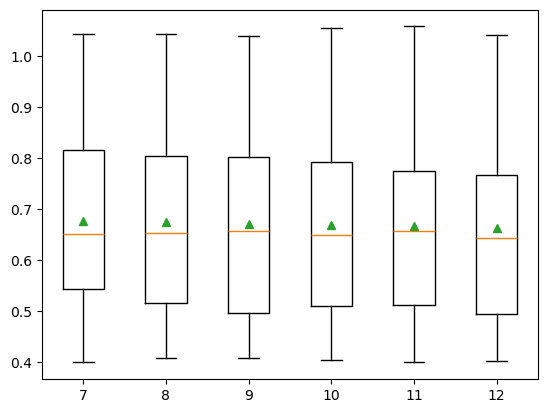

In [57]:
labels_l2, data_l2 = [*zip(*resA_l2.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
#labels, data = dict1.keys(), dict1.values()

plt.boxplot(data_l2, showmeans=True)
plt.xticks(range(1, len(labels_l2) + 1), labels_l2)
#plt.ylim(bottom=-1, top = 1.1)
plt.show()

if WRITE_OUTPUT:
    with open(f"{output}/bicv_l2norm.tsv", "w") as f:
        for i in range(0, len(labels_l2)):
            for j in data_l2[i]:
                f.write(str(labels_l2[i]) + "\t" + str(j) + "\n")

In [58]:
meansA_l2 = {k: mean(resA_l2[k]) for k in resA_l2}
mediansA_l2 = {k: median(resA_l2[k]) for k in resA_l2}

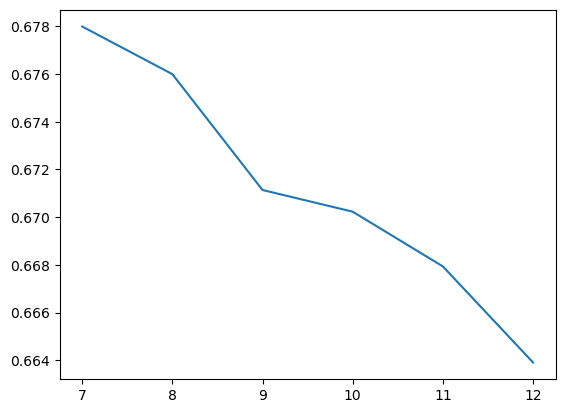

In [59]:
lists_l2 = sorted(meansA_l2.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_l2) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

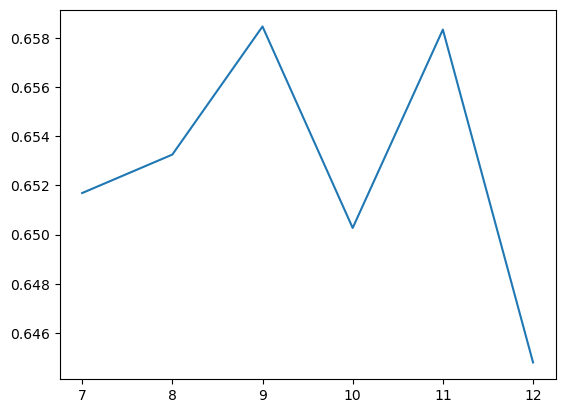

In [60]:
lists_l2 = sorted(mediansA_l2.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_l2) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()